# Block 5 Exercise 1: Classification

## MNIST Data
In these exercises we are using the MNIST data set on handwritten digits to compare supervised classification algorithms...   

In [1]:
#imports 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml

In [2]:
# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [3]:
#the full MNIST data set contains 70k samples of digits 0-9 as 28*28 gray scale images (represented as 784 dim vectors)
np.shape(X)

(70000, 784)

### E1.1: Use SkLearn methods to split the MNIST data into random train and test sets. Use 60k samples for training.  


In [4]:
print('test-size should be {} approximately'.format(100/np.shape(X)[0]*10000))

test-size should be 14.285714285714286 approximately


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.14, random_state=42) 

### E1.2: Visualize the data.
* Plot some data samples as images (use https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.imshow.html)

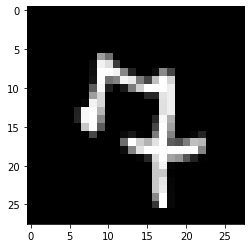

In [6]:
import matplotlib.pyplot as plt
plt.imshow(np.reshape(X_train[0,:], (28,28)), cmap='gray')

### E1.3: Train models on the train data.
Train the following models with default parameters on the train data.
* [Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB) (assuming a Gaussian distribution of the data)
* [Simple linear model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier)
   * use ``loss='log'`` to reproduce our logistic loss function 
* [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)

Compare the training accuracy (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) and [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix) for all three models.

In [7]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_pred = gnb.predict(X_test)

In [8]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='log')
sgd.fit(X_train, y_train)
sgd_pred = sgd.predict(X_test)

In [9]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

In [58]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, gnb_pred)

array([[ 878,    1,    6,    0,    3,    1,   32,    2,   25,   19],
       [   1, 1078,    3,    4,    0,    2,   11,    0,   22,    8],
       [  98,   30,  291,   67,    3,    4,  225,    0,  224,    8],
       [  63,   47,    9,  358,    0,    6,   52,    8,  359,  116],
       [  32,    4,   14,    4,  129,    5,   90,    4,  192,  411],
       [ 109,   19,    6,   15,    3,   49,   52,    2,  566,   93],
       [  11,   19,    4,    0,    1,    2,  885,    0,   21,    3],
       [   4,    7,    2,   13,    5,    2,    2,  302,   30,  664],
       [  18,  112,    5,    9,    2,    2,   21,    2,  571,  208],
       [   6,    4,    6,    1,    4,    0,    1,   14,   22,  953]])

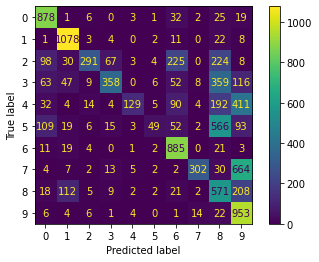

In [60]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(gnb, X_test, y_test)

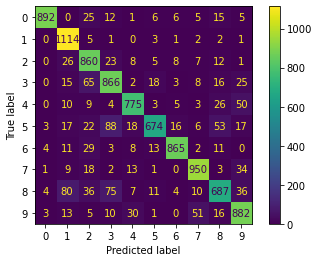

In [61]:
plot_confusion_matrix(sgd, X_test, y_test)

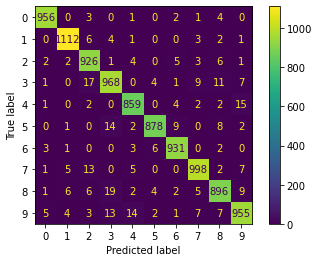

In [62]:
plot_confusion_matrix(rfc, X_test, y_test)

### E1.4: Evaluate and compare the models on the test set.
* compute the test [accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) 
* compute the [F-Measure](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score)
* plot a [ROC curves](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve) for the class "5" for all three models.
                          

In [10]:
from sklearn.metrics import accuracy_score
print('GNB accuracy score: {}'.format(accuracy_score(y_test, gnb_pred)))
print('SGD Classifier accuracy score: {}'.format(accuracy_score(y_test, sgd_pred)))
print('Random Forest Classifier accuracy score: {}'.format(accuracy_score(y_test, rfc_pred)))

GNB accuracy score: 0.5605550454035303
SGD Classifier accuracy score: 0.8738904193449648
Random Forest Classifier accuracy score: 0.9671462095704519


In [11]:
from sklearn.metrics import f1_score
print('GNB f1-score: {}'.format(f1_score(y_test, gnb_pred, average='weighted')))
print('SGD Classifier f1-score: {}'.format(f1_score(y_test, sgd_pred, average='weighted')))
print('Random Forest Classifier f1-score: {}'.format(f1_score(y_test, rfc_pred, average='weighted')))

GNB f1-score: 0.5195025455551061
SGD Classifier f1-score: 0.8730982898386684
Random Forest Classifier f1-score: 0.96712738032661


In [12]:
from sklearn.metrics import roc_curve
y_pred_gnb = gnb.predict_proba(X_test)[:,1]
fpr_gnb, tpr_gnb, _ = roc_curve(y_test, y_pred_gnb, pos_label='5')

In [34]:
np.any(np.isnan(y_pred_sgd))

True

In [49]:
y_pred_sgd = sgd.predict_proba(X_test)[:,1]
print('Are there NaN in? Answer: {}'.format(np.any(np.isnan(y_pred_sgd))))

# Replacing NaN by zero
where_are_NaNs = np.isnan(y_pred_sgd)
print('{} NaN affectey by replacing with zero'.format(len(y_pred_sgd[where_are_NaNs])))
y_pred_sgd[where_are_NaNs] = 0

Are there NaN in? Answer: True
1008 NaN affectey by replacing with zero


/home/andrea/anaconda3/envs/ds21/lib/python3.8/site-packages/sklearn/linear_model/_base.py:327: RuntimeWarning: invalid value encountered in true_divide
  prob /= prob.sum(axis=1).reshape((prob.shape[0], -1))


In [50]:
fpr_sgd, tpr_sgd, _ = roc_curve(y_test, y_pred_sgd, pos_label='5')

In [51]:
y_pred_rfc = rfc.predict_proba(X_test)[:,1]
fpr_rfc, tpr_rfc, _ = roc_curve(y_test, y_pred_rfc, pos_label='5')

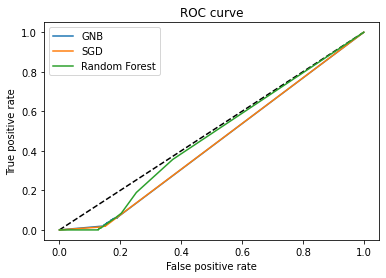

In [55]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_gnb, tpr_gnb, label='GNB')
plt.plot(fpr_sgd, tpr_sgd, label='SGD')
plt.plot(fpr_rfc, tpr_rfc, label='Random Forest')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()